### Sujet inspiré d'un TD d'Antoine Chevreuil: 

Nous considérons un signal de parole $x(t)$. Celui-ci est une alternance de silences, de sons voisés et de sons non-voisés. 

Les silences correspondent à des zones de faible énergie. 

Les sons voisés, comme les voyelles mais aussi certaines consonnes comme le m ou le z, mettent en jeu les cordes vocales et peuvent être avec raison considérés comme des signaux localement périodiques : leur fréquence fondamentale est appelée le pitch. 

Les sons non-voisés, eux, sont des sons provenant d'une vibration dans laquelle les cordes vocales ne sont pas sollicitées: on ne peut pas à proprement parler définir de pitch. 


On veut balayer le signal $x(t)$ et lui associer une fonction $p(t)$ définie ainsi: 
$$
p(t)=\left\{\begin{array}{c}
\text{le pitch en Hz si le son est voisé à l'instant } t \\
50 \text{ si le son n'est pas voisé} \\
0 \text{ si aucun signal sensible n'est émis}
\end{array}
\right.
$$


Si l'analyse de Fourier permet de déterminer le pitch, son emploi nécessite quelques précautions qui la rendent peu commode pour calculer la fonction $p(t)$. On décide de s'intéresser à une méthode moins précise mais beaucoup plus simple à mettre en oeuvre.




In [1]:
### import de librairies utiles
from __future__ import division
import numpy as np
import scipy.fftpack as sf
import matplotlib.pyplot as plt
import pylab as pl
import scipy.signal as sig
from scipy import misc

### On souhaite utiliser la méthode sur un signal long de 3 secondes qui contient de la parole. 
### Q1: Charger le fichier "chapeau_PB.wav", afficher sa fréquence et sa longueur. (on utilisera la fonction read de la bibliothèque "wavfile").

In [2]:
from scipy.io import wavfile
fs, data = wavfile.read('chapeau_PB.wav')
print("la frequence est ",fs," donc 1 seconde du signal correspond à ",fs, " points")
print("la longueur du signal numerique mono est ",len(data)//2)
## listen to a sound.
from IPython.display import Audio
Audio(data, rate = 11025)

la frequence est  11025  donc 1 seconde du signal correspond à  11025  points
la longueur du signal numerique mono est  16662


### Premier cas: Cas d'une sinusoïde pure.
On suppose que ce signal suit le modèle simplifié suivant : 
$$
x(t)= \cos (2\pi f_0 t)
$$
où $f_0$ désigne le pitch. Ce signal est observé pendant $T$ secondes et  échantillonné à la période $T_e$. On appelle $N$ le nombre d'échantillons : $N\approx \frac{T}{T_e}$ et on pose $x_n=x(nT_e)$ pour tout $n=0,1,...,N-1$.  

Soit $k$ un entier, appelé décalage; on définit le coefficient de corrélation d'indice $k$ ainsi : 
$$
r(k)=\frac{1}{N} \sum_n x(n)x(n-k)
$$
où les indices $n$ de la somme sont ceux pour lesquels le signal $x$ est défini. 
### Q2: Coder ce coefficient de corrélation $r(k)$ par la formule proposée. Quelle est la complexité (nombre de multiplications) de cette formule ?


In [ ]:
### votre code ici.

### Q3: En utilisant la propriété de la convolution en Fourier, implémenter une autre façon de calculer ce vecteur de corrélation (on utilisera la librairie "sf" et les fonctions "fft" et "ifft"). Quelle est la complexité de cette méthode ?



In [ ]:
### votre code ici.

### Q4: Vérifier que les deux implémentations donnent le même résultat à précision numérique près et comparer les deux implémentations en évaluant le temps de calcul pour chacune des méthodes. On pourra prendre des vecteurs de grande taille.

In [ ]:
### votre code ici.

### Q5: Pour une fréquence d'échantillonage de $11025$, un temps $T = 30ms$ et une fréquence de sinusoïde pure de $f_0 = 200Hz$, tracer le graphe de ce signal idéal et en calculer la corrélation, qu'on tracera aussi sur le même graphique.

11025.0


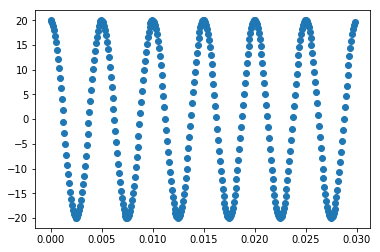

In [4]:
fs = 44100/4 # fq d'échantillonage
T = 0.03 # duree du signal en secondes
fq = 200
t_range = np.arange(0,int(T * fs))/fs
y = 20*np.cos(2*np.pi*fq * t_range)
pl.plot(t_range,y,"o")
print(fs)

### Dans les deux questions qui suivent, il faut faire attention à l'erreur de discrétisation. On va sélectionner le minimum ou le maximum d'un vecteur et ce maximum est un maximum "absolu". Le plus robuste est de prendre des maximums approchés à $\varepsilon$ près pour une valeur de $\varepsilon \simeq 0.1$. Cette valeur dépend en fait de la fréquence de l'harmonique et de la fréquence d'échantillonnage.
### Q6: Estimer avec la fonction de corrélation, le premier indice $k$ pour lequel la corrélation est minimum. Calculer explicitement $\frac{f_s}{2 * f_0}$. Que constate-t-on? Justifier le en faisant le calcul théorique du minimum. On utilisera la formule $2\cos(a)\cos(b) = \cos(a +b) + \cos(a - b)$.

In [5]:
### votre code ici.

### Q7: Conclure que pour obtenir une approximation de la fréquence d'une harmonique, il suffit d'avoir accès aux maximums de la corrélation du signal avec lui-même. Écrire une estimation en fonction des données numériques.

In [ ]:
### votre code ici.

### Q8: Faire le même travail avec l'estimation de la position des maximums. À quoi est due l'erreur entre la fréquence théorique et l'estimation?

In [ ]:
### votre code ici.

### Q9: Définir une fonction qui permet de faire l'estimation du pitch automatiquement. On pourra aussi utiliser l'a priori sur la fréquence à estimer $f_0 \in [100 Hz,500 Hz]$.

In [ ]:
### votre code ici.

### Q9 bis: Ajouter du bruit au signal harmonique précédent et estimer la fréquence. Que constatez-vous ? Que pouvez-vous conclure sur la robustesse de la méthode ? Tracer la fft du signal bruité.

In [ ]:
### votre code ici.

### Q10: Définir une fonction qui à un signal long (disons 3 secondes) renvoie la fréquence estimée sur des intervalles consécutifs de 22,5 ms sur les intervalles de temps qui contiennent du signal de la voix.

In [ ]:
### votre code ici.

### Q11: Tracer l'énergie du signal sur des morceaux de taille $length$. Trouver à la main un seuil qui dit que le morceau de signal est voisé ou ne l'est pas.

In [ ]:
### votre code ici.